# 2010 Baja CA EQ, QTM Catalog Mapping: Density Grid Test Points, β-statistic, 30 days BEFORE



In [26]:
# IMPORT CELL; updated 2/11/21

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import obspy
from obspy.core import UTCDateTime
from obspy import read

import obspy.geodetics as gd # Imported whole file
#from obspy.geodetics import locations2degrees # calc_dist() alike?
#from obspy.taup.taup_geo import calc_dist # calc_dist()

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

print("Imported! ")

Imported! 


In [27]:
%%time
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range

Wall time: 565 ms


,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
341563,2010,3,5,22,40,56.570,332205,33.63921,-116.69371,16.395,...,11023517,0.208,0.021,0,2010-03-05T22:40:56.570000Z,1.267829e+09,2010-03-05T22:40:56.570000Z,1.267829e+09,-30.0,-720.0
341564,2010,3,5,22,44,28.810,332206,33.00096,-116.33812,8.098,...,14599964,0.274,0.024,0,2010-03-05T22:44:28.810000Z,1.267829e+09,2010-03-05T22:44:28.809999Z,1.267829e+09,-30.0,-720.0
341565,2010,3,5,22,59,35.670,332207,33.68388,-116.70518,16.740,...,9715717,0.182,0.019,0,2010-03-05T22:59:35.670000Z,1.267830e+09,2010-03-05T22:59:35.670000Z,1.267830e+09,-30.0,-720.0
341566,2010,3,5,23,22,38.272,14597244,33.89683,-116.20141,9.967,...,14597244,1.0,0.01,1,2010-03-05T23:22:38.272000Z,1.267831e+09,2010-03-05T23:22:38.271999Z,1.267831e+09,-30.0,-719.0
341567,2010,3,5,23,37,37.430,332209,33.17265,-115.61604,2.806,...,11247074,0.191,0.02,0,2010-03-05T23:37:37.430000Z,1.267832e+09,2010-03-05T23:37:37.429999Z,1.267832e+09,-30.0,-719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.330,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.290,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.620,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0
479975,2010,5,4,22,37,25.670,465027,33.72415,-116.82370,17.104,...,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09,30.0,720.0


In [28]:
# Set mean latitudes and longitudes
MeanLat = QTM_Range["LATITUDE"].mean()
MeanLon = QTM_Range["LONGITUDE"].mean() 

# Define two more datasets of 30 days before and 30 days after Baja EQ
QTM_TEMP = QTM_Range.loc[QTM_Range["EVENTID"] == ""] # Get Baja EQ
QTM_TEMP = QTM_TEMP.iloc[0]
BajaTimestamp = float(QTM_TEMP["TIMESTAMP"])
BajaTimestamp

1270420842.0

In [29]:
QTM_Range_BEFORE = QTM_Range.loc[QTM_Range["TIMESTAMP"] <= BajaTimestamp]
QTM_Range_AFTER = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]

QTM_Range_BEFORE.describe()
QTM_Range_AFTER

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
356879,2010,4,4,22,40,42.00,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356879,2010,4,4,22,40,42.00,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356880,2010,4,4,22,40,42.16,14607652,32.27350,-115.29400,13.990,...,14607652,1.0,0.01,0,2010-04-04T22:40:42.160000Z,1.270421e+09,2010-04-04T22:40:42.159999Z,1.270421e+09,0.0,0.0
356881,2010,4,4,22,41,45.87,347184,34.43929,-116.93557,-0.583,...,9807541,0.264,0.026,0,2010-04-04T22:41:45.870000Z,1.270421e+09,2010-04-04T22:41:45.869999Z,1.270421e+09,0.0,0.0
356882,2010,4,4,22,41,54.35,347185,33.16622,-115.59365,4.499,...,10531677,0.163,0.017,0,2010-04-04T22:41:54.350000Z,1.270421e+09,2010-04-04T22:41:54.350000Z,1.270421e+09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.33,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.29,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.62,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0
479975,2010,5,4,22,37,25.67,465027,33.72415,-116.82370,17.104,...,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09,30.0,720.0


In [30]:
QTM_Range["LONGITUDE"].values[0]
len(QTM_Range)
QTM_Range["LONGITUDE"].values

Faults = pd.read_csv("cafaults.xy", sep = "[\s]", names = ["LONGITUDE", "LATITUDE"])
# Read in fault traces
Faults
#Faults.describe()
#print(Faults.LATITUDE)
#Faults["LONGITUDE"].astype(float)
#Faults = Faults.loc[Faults["LONGITUDE"] == float]
#Faults.columns = ["LONGITUDE", "LATITUDE"]
#Faults
#Faults.LONGITUDE.astype(float)

FaultsIndices = list(Faults.loc[Faults["LONGITUDE"] == ">"].index)
#FaultsIndices

## Density Grid: First Gridpoint - Point1

(32.7, -115.8)

In [31]:
GridPoints = pd.read_csv("Maps/Density Grid/GridPoints.csv")

In [32]:
# Create first point for analysis

Point1 = GridPoints.loc[(GridPoints["LATITUDE"] >= 32.7) & (GridPoints["LONGITUDE"] >= -115.8)]
#Point1 = Point1.loc[Point1["LONGITUDE"] == -115.8]
Point1 = Point1.iloc[0]
Point1 # 32.7, -115.8

Unnamed: 0    742.0
LATITUDE       32.7
LONGITUDE    -115.8
Name: 742, dtype: float64

In [33]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists1_Deg = gd.locations2degrees(Point1.LATITUDE, Point1.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point1
Dists1_KM = gd.degrees2kilometers(Dists1_Deg)
# Converted all distances to kilometers
Dists1_KM


array([ 133.51326785,   60.38831846,  138.06892128, ...,    4.57994691,
        148.45194808,    9.32164714])

## Density Grid: Second Point - Point2
Along fault line<br>(32.6585, -115.8862)

In [34]:
# Create second point for analysis: fault line

Point2 = pd.DataFrame({"LATITUDE" : [32.6585], "LONGITUDE" : [-115.8862]})
#Point2["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point2

,LATITUDE,LONGITUDE
0,32.6585,-115.8862


In [35]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists2_Deg = gd.locations2degrees(Point2.LATITUDE, Point2.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point2
Dists2_KM = gd.degrees2kilometers(Dists2_Deg)
# Converted all distances to kilometers
Dists2_KM

array([ 132.45094474,   56.85981535,  137.14932701, ...,    8.9222135 ,
        147.14223339,   16.29985863])

### Density Grid: Third Point - Point3
Along fault line<br>(33.5059, -116.4916)

In [36]:
# Create third point for analysis: fault line

Point3 = pd.DataFrame({"LATITUDE" : [33.5059], "LONGITUDE" : [-116.4916]})
#Point2["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point3

,LATITUDE,LONGITUDE
0,33.5059,-116.4916


In [37]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists3_Deg = gd.locations2degrees(Point3.LATITUDE, Point3.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point3
Dists3_KM = gd.degrees2kilometers(Dists3_Deg)
# Converted all distances to kilometers
Dists3_KM

array([  23.88193772,   57.93217336,   27.98211099, ...,  114.53718859,
         39.17486556,  118.78201122])

## Density Grid: Fourth Point - Point4
Salton Sea Geothermal Field<br>(33.163333, -115.616667)

In [38]:
# Create fourth point for analysis: Salton Sea Geothermal Field

Point4 = pd.DataFrame({"LATITUDE" : [33.163333], "LONGITUDE" : [-115.616667]})
#Point3["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point4

,LATITUDE,LONGITUDE
0,33.163333,-115.616667


In [39]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists4_Deg = gd.locations2degrees(Point4.LATITUDE, Point4.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point3
Dists4_KM = gd.degrees2kilometers(Dists4_Deg)
# Converted all distances to kilometers
Dists4_KM

array([ 113.11966027,   69.59950866,  116.42661925, ...,   58.33360844,
        128.18320016,   56.60893844])

In [40]:
# Plot density points

Points = pd.DataFrame(Point1).T
Points = Points.drop(labels = "Unnamed: 0", axis = 1)
Points
Points = pd.concat([Points, Point2, Point3, Point4])
#type(Point1)
# Points = Point1, Point2, Point3, Point4
Points

,LATITUDE,LONGITUDE
742,32.700000,-115.800000
0,32.658500,-115.886200
0,33.505900,-116.491600
0,33.163333,-115.616667


## β-statistic (3/4)
All points

In [41]:
# Redefine all points; distances counts: 0.1deg 
Point1 = pd.DataFrame({"LATITUDE" : [32.7], "LONGITUDE" : [-115.8]})
Point1Data = QTM_Range.copy(deep = True)
Point1Data["DEGDIST"] = Dists1_Deg
Point1Data_Deg = Point1Data.loc[Point1Data["DEGDIST"] <= 0.1]

Point2Data = QTM_Range.copy(deep = True)
Point2Data["DEGDIST"] = Dists2_Deg
Point2Data_Deg = Point2Data.loc[Point2Data["DEGDIST"] <= 0.1]

Point3Data = QTM_Range.copy(deep = True)
Point3Data["DEGDIST"] = Dists3_Deg
Point3Data_Deg = Point3Data.loc[Point3Data["DEGDIST"] <= 0.1]

Point4Data = QTM_Range.copy(deep = True)
Point4Data["DEGDIST"] = Dists4_Deg
Point4Data_Deg = Point4Data.loc[Point4Data["DEGDIST"] <= 0.1]

In [42]:
Point2Data_Deg.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LATITUDE,LONGITUDE,DEPTH,MAGNITUDE,TIMESTAMP,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR,DEGDIST
count,47217.0,47217.000000,47217.000000,47217.000000,47217.000000,47217.000000,47217.000000,47217.000000,47217.000000,47217.000000,4.721700e+04,4.721700e+04,47217.000000,47217.000000,47217.000000
mean,2010.0,4.061143,15.485164,11.227969,29.540272,29.903648,32.677003,-115.824243,6.781448,0.305158,1.271532e+09,1.271532e+09,12.862613,308.617426,0.069360
std,0.0,0.256336,7.403802,6.677312,17.306135,17.322328,0.025984,0.046190,3.201142,0.756356,6.811520e+05,6.811520e+05,7.897478,189.208980,0.020954
min,2010.0,3.000000,1.000000,0.000000,0.000000,0.003000,32.563610,-115.994970,-0.693000,-1.920000,1.267837e+09,1.267837e+09,-30.000000,-718.000000,0.004008
25%,2010.0,4.000000,10.000000,6.000000,14.000000,14.790000,32.666520,-115.844030,4.940000,-0.230000,1.270951e+09,1.270951e+09,6.000000,147.000000,0.052357
50%,2010.0,4.000000,15.000000,11.000000,30.000000,29.890000,32.675320,-115.811310,6.710000,0.220000,1.271450e+09,1.271450e+09,12.000000,286.000000,0.074050
75%,2010.0,4.000000,22.000000,17.000000,45.000000,44.832000,32.691840,-115.787610,8.196000,0.740000,1.272051e+09,1.272051e+09,19.000000,453.000000,0.086358
max,2010.0,5.000000,31.000000,23.000000,59.000000,59.998000,32.758000,-115.767540,28.090000,4.960000,1.273013e+09,1.273013e+09,30.000000,720.000000,0.099998


In [43]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(QTM_Range)
for i in TimeframeSeq:
    QTM_Temp = QTM_Range_AFTER.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    BetasDF = BetasDF.append(DFTemp)

In [44]:
# TEST CELL
QTM_Range_AFTER.describe()
#BetasDF = pd.DataFrame(columns = ["a", "b"])
NaTest = len(QTM_Range_AFTER.loc[QTM_Range_AFTER["TIMESTAMP"]<=BajaTimestamp+24*30*60*60])
LambdaTest = Nb*24*30/(24*60)
BetaTest = (NaTest - LambdaTest)/np.sqrt(LambdaTest)
BetaTest
DFTempTest = pd.DataFrame(data = [[BetaTest, 24*30]], columns = ["BetaStat", "Timeframe (hours after)"]) # Need double brackets for dimensions
DFTempTest
BetasDF.append(DFTempTest, ignore_index = True, sort = True)

,BetaStat,Timeframe (hours after)
0,16.498671,2
1,24.219041,12
2,29.857843,24
3,185.585833,168
4,199.116167,240
5,231.978809,480
6,204.853643,720
7,204.853643,720


### β = (Na - Λ)/√Λ
### Λ = Nb * Δta/Δtb
beta = Na - lambda/sqrt(lambda)

lambda = Nb * delta time,a / delta time,b

Na = number of events during time period of interest delta time,a

Nb = total reference number of events during total reference time period delta time,b

#### Point 1

In [45]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point1BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point1Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point1Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp - i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point1BetasDF = Point1BetasDF.append(DFTemp)
Point1BetasDF

,BetaStat,Timeframe (hours after)
0,-10.418701,2
0,-25.636990,12
0,-36.283635,24
0,-96.059741,168
0,-114.799707,240
0,-161.878560,480
0,-198.282494,720


#### Point 2

In [46]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point2BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point2Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point2Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp - i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point2BetasDF = Point2BetasDF.append(DFTemp)
Point2BetasDF

,BetaStat,Timeframe (hours after)
0,-8.098096,2
0,-19.735379,12
0,-27.945687,24
0,-73.977759,168
0,-88.394568,240
0,-124.355177,480
0,-152.303365,720


#### Point 3

In [47]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point3BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point3Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point3Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp - i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point3BetasDF = Point3BetasDF.append(DFTemp)
Point3BetasDF

,BetaStat,Timeframe (hours after)
0,-2.513734,2
0,-3.393162,12
0,-3.353960,24
0,-12.085764,168
0,-16.169006,240
0,-23.816557,480
0,-30.488026,720


#### Point 4

In [48]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point4BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point4Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point4Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp - i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point4BetasDF = Point4BetasDF.append(DFTemp)
Point4BetasDF

,BetaStat,Timeframe (hours after)
0,-1.475527,2
0,-2.171321,12
0,-3.507997,24
0,-1.953955,168
0,-5.654183,240
0,-13.374116,480
0,-12.800523,720


## Plotting β-statistics 

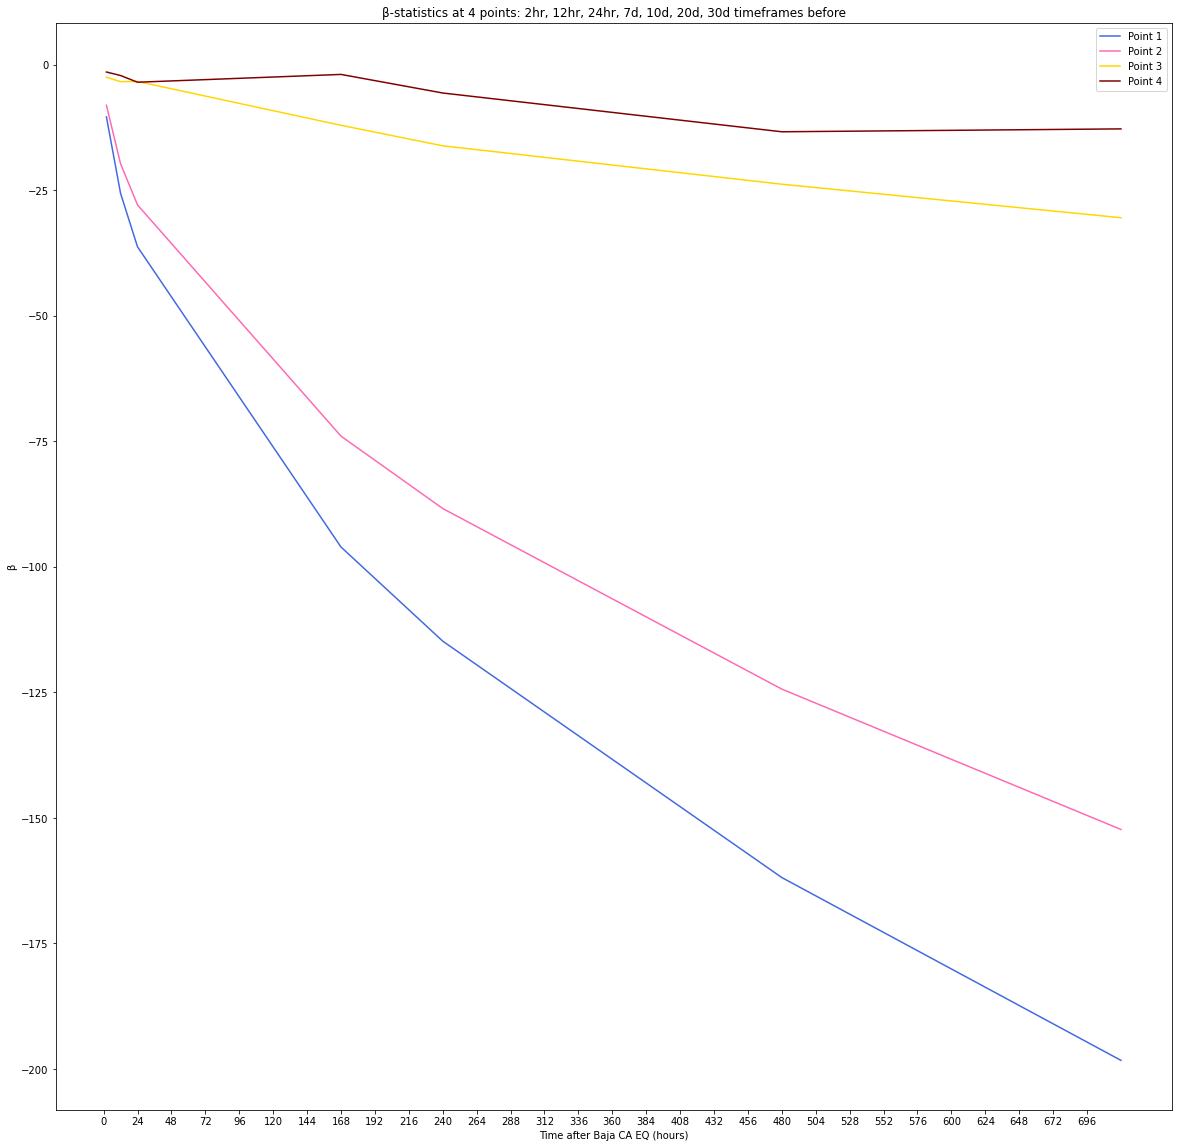

In [49]:
# Plot all timeframe βs 

plt.figure(figsize=(20,20))

plt.plot(Point1BetasDF["Timeframe (hours after)"], Point1BetasDF.BetaStat, c = "royalblue");
plt.plot(Point2BetasDF["Timeframe (hours after)"], Point2BetasDF.BetaStat, c = "hotpink");
plt.plot(Point3BetasDF["Timeframe (hours after)"], Point3BetasDF.BetaStat, c = "gold");
plt.plot(Point4BetasDF["Timeframe (hours after)"], Point4BetasDF.BetaStat, c = "maroon");

plt.xlabel("Time after Baja CA EQ (hours)");
plt.ylabel("β");
plt.title("β-statistics at 4 points: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d timeframes before");
plt.xticks(np.arange(0, 720, 24));
plt.legend(["Point 1", "Point 2", "Point 3", "Point 4"]);

plt.savefig("Maps/Density Grid/β-statistics/ALLPoints_β_BEFORE_1", facecolor = "white");